## Avtaar Carreer Learning
### Machine Learning Engineer Track
### Assignemnt 1 : Exploratory Data Analysis
### <font color='red'>Author : Sahil Kavitake</font>

## Goal 🎯
The objective of this project is to allow you to exercise a very crucial step of the AI/ML flow:
- data cleaning
- data visualization
<br>Being fluent in these skills will be the foundational setup for how you approach data modeling 

## Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


## Importing Data

In [2]:
data = pd.read_csv("sales_full_data.csv")
print(data.shape)
data.tail()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## About Data
- Data contain 12 months worth of sales data.
- We have 186850 rows and6 columns in the dataset

## Data fields
- Order ID = unique id of the order
- Product = name of the product
- Quantity ordered = Quantity
- Price each = Price of single unit
- Order Date = Date of order
- Purchase Address = Customer Address

## Data Cleaning

In [3]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## we will simply delete the rows with NaN values

print('Shape before deleting NaN values:', data.shape)
data.dropna(inplace=True)
print('Shape After deleting NaN  values:', data.shape)

Shape before deleting NaN values: (186850, 6)
Shape After deleting NaN  values: (186305, 6)


In [6]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              18
Order Date          142396
Purchase Address    140788
dtype: int64

#### It seems there is some duplicate data as unique id count is not matching with data count

In [8]:
data.duplicated().sum()

618

In [9]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04-07-19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


#### Lossing 618 data points out of 186305 is okay so we will delete those

In [10]:
## we will simply delete the rows with duplicate values
print('Shape before deleting duplicate values:', data.shape)

data.drop_duplicates(inplace=True, keep=False)
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (186305, 6)
Shape After deleting duplicate values: (185422, 6)


In [11]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
for column in data[["Product","Quantity Ordered","Price Each"]]:
    print(column,data[column].unique())

Product ['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor']
Quantity Ordered ['2' '1' '3' '5' '4' '7' '6' '8' '9']
Price Each ['11.95' '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150' '2.99'
 '700' '300' '149.99' '109.99' '999.99' '400' '379.99']


In [13]:
## we will convert quantity to int price to float and order date to date
df = data.copy()

df = df.astype({'Quantity Ordered': np.int, 'Price Each': np.float, 'Order Date':np.datetime64})

df.dtypes



Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [14]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215"


## We will try to find out answers for following questions

- Which month had the highest and lowest sales ? 
- At what time of the day would you put out advertisements so that sales increase ?
- What products were sold the most ?



### <font color='red'>1. Which month had the highest and lowest sales ?</font>

#### We will add some columns that will be helpful in future

In [15]:
df["_orderBill"] = df["Quantity Ordered"]*df["Price Each"]
df["_order"] = 1

In [16]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,_orderBill,_order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,1
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,1
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,1
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,1
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,1
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,1


In [17]:
df.groupby(pd.Grouper(key='Order Date', axis=0, freq='M')).sum().sort_values(by="_orderBill")

,Quantity Ordered,Price Each,_orderBill,_order
Order Date,,,,
2020-01-31,41,8.503400e+03,8.670290e+03,34
2019-01-31,10842,1.801578e+06,1.811899e+06,9655
2019-09-30,13073,2.078803e+06,2.091371e+06,11585
2019-02-28,13413,2.184996e+06,2.198134e+06,11939
2019-08-31,13410,2.223582e+06,2.237699e+06,11925
2019-06-30,15215,2.558981e+06,2.574758e+06,13516
2019-07-31,16036,2.629911e+06,2.645147e+06,14257
2019-03-31,16953,2.786961e+06,2.802846e+06,15103
2019-05-31,18639,3.131144e+06,3.148626e+06,16538


#### It seems there very low count of data for january 2020

In [18]:
df[df["Order Date"] >= '2020-01-01']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,_orderBill,_order
31957,297150,Lightning Charging Cable,1,14.95,2020-01-01 00:38:00,"427 Wilson St, Dallas, TX 75001",14.95,1
32659,297817,iPhone,1,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",700.00,1
32660,297817,Lightning Charging Cable,2,14.95,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",29.90,1
32819,297969,Google Phone,1,600.00,2020-01-01 00:54:00,"542 2nd St, San Francisco, CA 94016",600.00,1
33200,298344,Wired Headphones,4,11.99,2020-01-01 03:34:00,"731 7th St, New York City, NY 10001",47.96,1
33947,299049,Apple Airpods Headphones,1,150.00,2020-01-01 01:17:00,"762 Johnson St, San Francisco, CA 94016",150.00,1
34027,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",11.95,1
35335,300362,USB-C Charging Cable,1,11.95,2020-01-01 00:59:00,"581 River St, San Francisco, CA 94016",11.95,1
35497,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",99.99,1
35498,300519,Lightning Charging Cable,1,14.95,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",14.95,1


#### These are the orders taken after 31 st december 2019
#### All the orders are taken on 1st of January 2020 So we will delete this data

In [19]:
df = df[df["Order Date"] < '2020-01-01']

In [20]:
df.groupby(pd.Grouper(key='Order Date', axis=0, 
                      freq='M')).sum().sort_values(by="_orderBill")

,Quantity Ordered,Price Each,_orderBill,_order
Order Date,,,,
2019-01-31,10842,1.801578e+06,1.811899e+06,9655
2019-09-30,13073,2.078803e+06,2.091371e+06,11585
2019-02-28,13413,2.184996e+06,2.198134e+06,11939
2019-08-31,13410,2.223582e+06,2.237699e+06,11925
2019-06-30,15215,2.558981e+06,2.574758e+06,13516
2019-07-31,16036,2.629911e+06,2.645147e+06,14257
2019-03-31,16953,2.786961e+06,2.802846e+06,15103
2019-05-31,18639,3.131144e+06,3.148626e+06,16538
2019-11-30,19740,3.177144e+06,3.196147e+06,17515


In [21]:
orders_by_month = df.groupby(pd.Grouper(key='Order Date', axis=0, freq='M')).sum().sort_values(by="_orderBill")
orders_by_month

,Quantity Ordered,Price Each,_orderBill,_order
Order Date,,,,
2019-01-31,10842,1.801578e+06,1.811899e+06,9655
2019-09-30,13073,2.078803e+06,2.091371e+06,11585
2019-02-28,13413,2.184996e+06,2.198134e+06,11939
2019-08-31,13410,2.223582e+06,2.237699e+06,11925
2019-06-30,15215,2.558981e+06,2.574758e+06,13516
2019-07-31,16036,2.629911e+06,2.645147e+06,14257
2019-03-31,16953,2.786961e+06,2.802846e+06,15103
2019-05-31,18639,3.131144e+06,3.148626e+06,16538
2019-11-30,19740,3.177144e+06,3.196147e+06,17515


In [22]:
orders_by_month.index.month_name().str[:3]

Index(['Jan', 'Sep', 'Feb', 'Aug', 'Jun', 'Jul', 'Mar', 'May', 'Nov', 'Apr',
       'Oct', 'Dec'],
      dtype='object', name='Order Date')

In [23]:
orders_by_month["_month"] = orders_by_month.index.month_name().str[:3]
orders_by_month.set_index("_month", inplace=True)
orders_by_month

,Quantity Ordered,Price Each,_orderBill,_order
_month,,,,
Jan,10842,1.801578e+06,1.811899e+06,9655
Sep,13073,2.078803e+06,2.091371e+06,11585
Feb,13413,2.184996e+06,2.198134e+06,11939
Aug,13410,2.223582e+06,2.237699e+06,11925
Jun,15215,2.558981e+06,2.574758e+06,13516
Jul,16036,2.629911e+06,2.645147e+06,14257
Mar,16953,2.786961e+06,2.802846e+06,15103
May,18639,3.131144e+06,3.148626e+06,16538
Nov,19740,3.177144e+06,3.196147e+06,17515


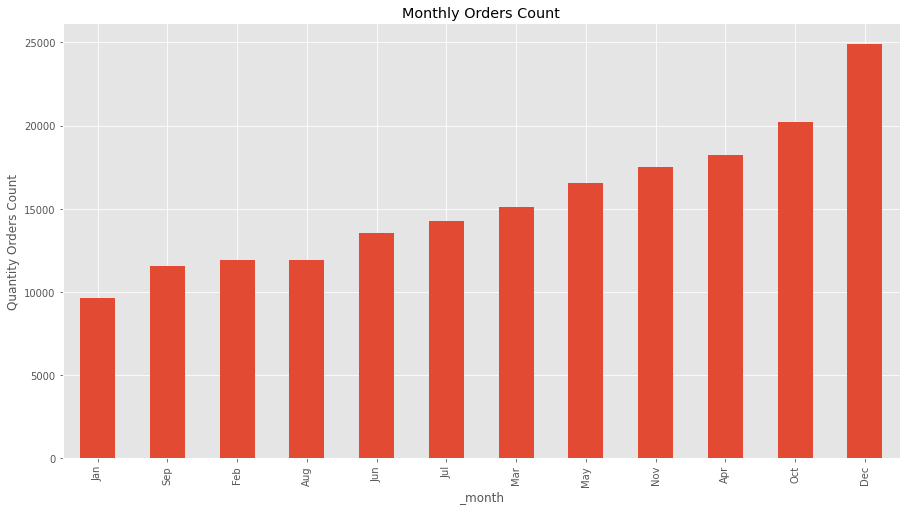

In [24]:
plt.figure(figsize=((15,8)))
temp = orders_by_month["_order"]
temp.plot.bar()
plt.title("Monthly Orders Count")
plt.ylabel("Quantity Orders Count")
plt.show()

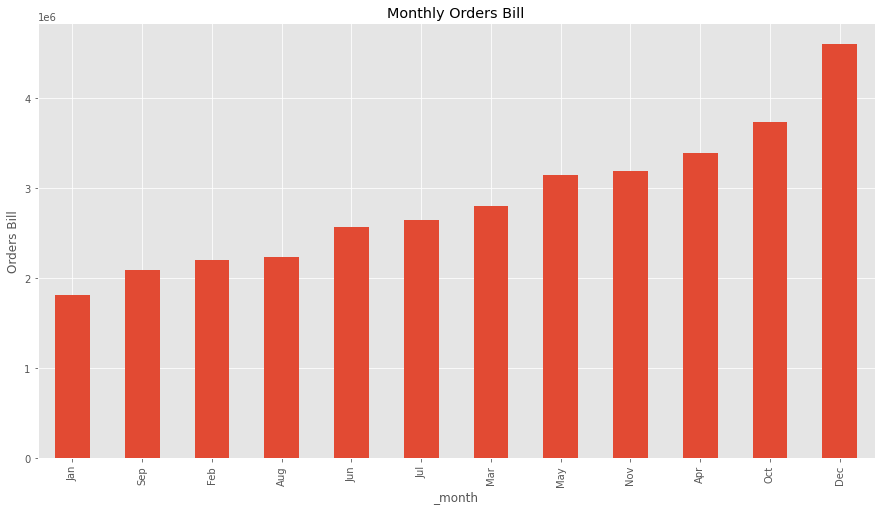

In [25]:
plt.figure(figsize=((15,8)))
temp = orders_by_month["_orderBill"]
temp.plot.bar()
plt.title("Monthly Orders Bill")
plt.ylabel("Orders Bill")
plt.show()

### <font color='green'>From this we can clearly state that January and December months had lowest and highest sales respectively in year 2019. <br><br> Reason behind this can be the christmas and new year. People buy gifts for family and loved ones on these occassions</font>

### <font color='red'>2. At what time of the day would you put out advertisements so that sales increase ?</font>

In [26]:
times = pd.DatetimeIndex(df["Order Date"])
print(times)
print(set(times.hour))

DatetimeIndex(['2019-04-19 08:46:00', '2019-04-07 22:30:00',
               '2019-04-12 14:38:00', '2019-04-12 14:38:00',
               '2019-04-30 09:27:00', '2019-04-29 13:03:00',
               '2019-04-02 07:46:00', '2019-04-12 10:58:00',
               '2019-04-24 10:38:00', '2019-04-08 14:05:00',
               ...
               '2019-09-01 22:14:00', '2019-09-30 13:49:00',
               '2019-09-30 13:49:00', '2019-09-01 19:43:00',
               '2019-09-07 15:49:00', '2019-09-17 20:56:00',
               '2019-09-01 16:00:00', '2019-09-23 07:39:00',
               '2019-09-19 17:30:00', '2019-09-30 00:18:00'],
              dtype='datetime64[ns]', name='Order Date', length=185388, freq=None)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [27]:
df.groupby([times.hour])["_order"].sum()

Order Date
0      3882
1      2335
2      1237
3       826
4       846
5      1317
6      2480
7      3993
8      6248
9      8732
10    10914
11    12373
12    12559
13    12101
14    10946
15    10143
16    10334
17    10869
18    12246
19    12867
20    12208
21    10889
22     8794
23     6249
Name: _order, dtype: int64

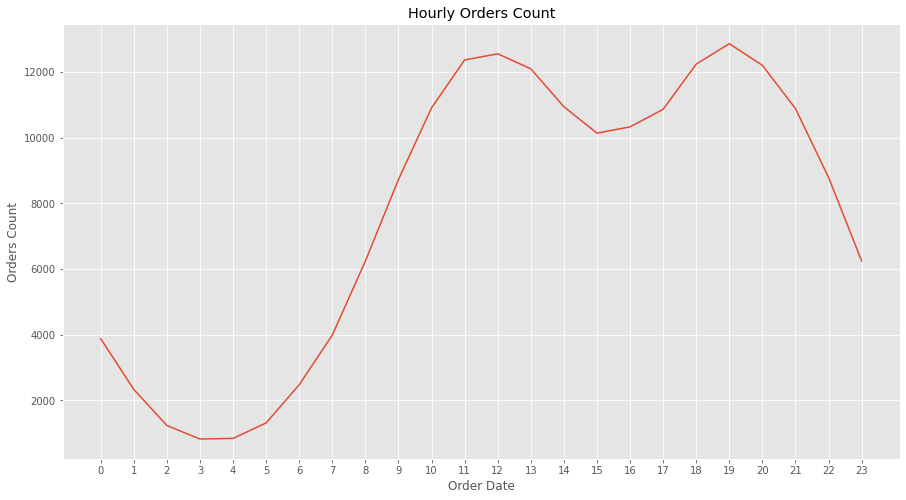

In [28]:
plt.figure(figsize=((15,8)))
temp = df.groupby([times.hour])["_order"].sum()
temp.plot()
plt.title("Hourly Orders Count")
plt.ylabel("Orders Count")
plt.xticks(temp.index)
plt.show()

### <font color='green'>From this plot we can conclude that Most of the orders takes place around 12.00 and 19.00 <br><br> So to increase the sales we can put out advertisements slightly before <br><br> i.e. In between 8.00 to 10.00 and 14.00 to 17.00</font>

### <font color='red'>3. What products were sold the most ?</font>

In [29]:
most_sold_products = df.groupby(pd.Grouper(key='Product', axis=0)).sum()
most_sold_products

,Quantity Ordered,Price Each,_orderBill,_order
Product,,,,
USB-C Charging Cable,23883,260641.45,285401.85,21811
Bose SoundSport Headphones,13400,1326667.32,1339866.00,13268
Google Phone,5525,3310800.00,3315000.00,5518
Wired Headphones,20487,225591.85,245639.13,18815
Macbook Pro Laptop,4721,8018900.00,8025700.00,4717
Lightning Charging Cable,23115,322277.15,345569.25,21557
27in 4K Gaming Monitor,6233,2425347.81,2430807.67,6219
AA Batteries (4-pack),27595,78869.76,105964.80,20539
Apple Airpods Headphones,15609,2324550.00,2341350.00,15497


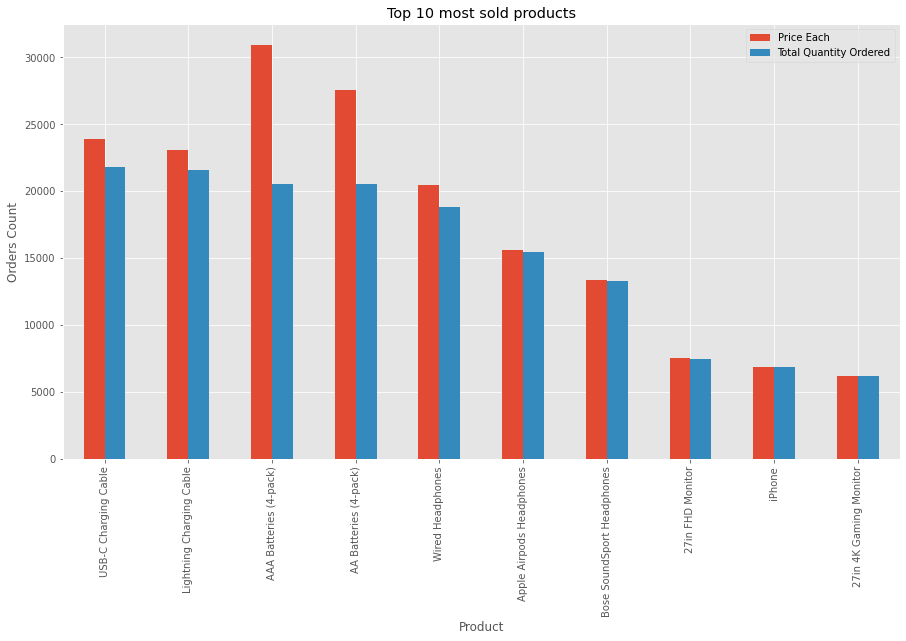

In [30]:
temp = most_sold_products[["Quantity Ordered", "_order"]].sort_values(by="_order",ascending=False).head(10)
temp.plot.bar(figsize=((15,8)))
plt.legend(["Price Each","Total Quantity Ordered", "Total Orders Count"])
plt.title("Top 10 most sold products")
plt.ylabel("Orders Count")
plt.show()

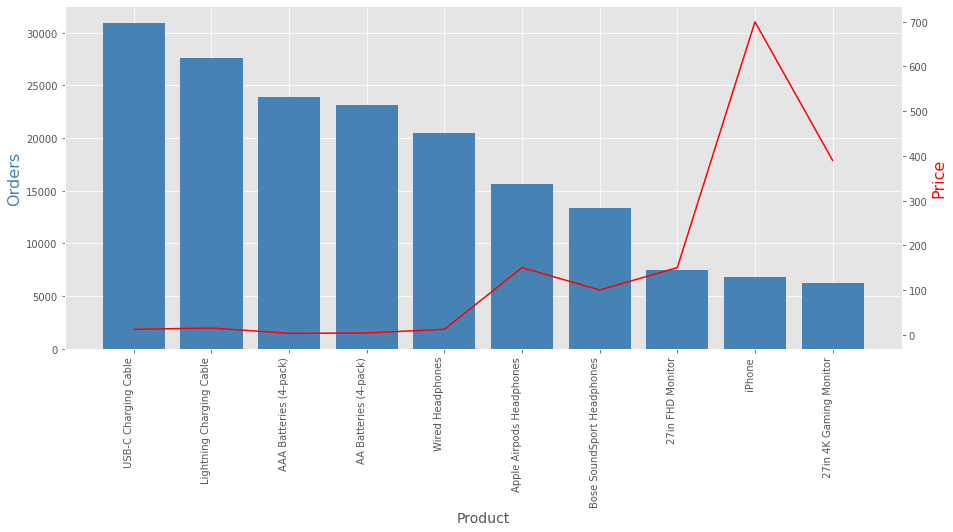

In [32]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

temp1 = most_sold_products[["Quantity Ordered", "_order"]].sort_values(by="Quantity Ordered",ascending=False).head(10)
temp2 = most_sold_products[["Price Each", "_order"]].sort_values(by="_order",ascending=False).head(10)
#define subplots
fig,ax = plt.subplots(figsize = (15,7))

#add first line to plot
ax.bar(temp1.index, temp1["Quantity Ordered"], color=col1)

#add x-axis label
ax.set_xlabel('Product', fontsize=14)

#add y-axis label
ax.set_ylabel('Orders', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(temp2.index, temp2["Price Each"]/temp2["_order"], color=col2)

#add second y-axis label
ax2.set_ylabel('Price', color=col2, fontsize=16)

plt.grid()
fig.autofmt_xdate(rotation=90)
plt.show()

### <font color='green'>From this plot we can conclude that products with low prices were sold the most.</font>

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,_orderBill,_order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,1


### <font color='red'>4. What city sold the most product ?</font>

In [34]:
df['_city'] = df['Purchase Address'].apply(lambda x: x.split(",")[1].strip(" "))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,_orderBill,_order,_city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,1,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,1,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,1,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,1,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,1,Los Angeles


In [35]:
df.groupby(['_city']).sum().sort_values(by="_order" , ascending=False)

,Quantity Ordered,Price Each,_orderBill,_order
_city,,,,
San Francisco,50086,8.194166e+06,8.244798e+06,44580
Los Angeles,33204,5.411908e+06,5.443038e+06,29522
New York City,27858,4.629187e+06,4.658076e+06,24808
Boston,22456,3.630060e+06,3.654286e+06,19864
Atlanta,16566,2.777309e+06,2.792900e+06,14845
Dallas,16682,2.745710e+06,2.761058e+06,14772
Seattle,16514,2.727727e+06,2.742187e+06,14693
Portland,14019,2.305277e+06,2.318020e+06,12431
Austin,11119,1.806306e+06,1.816007e+06,9873


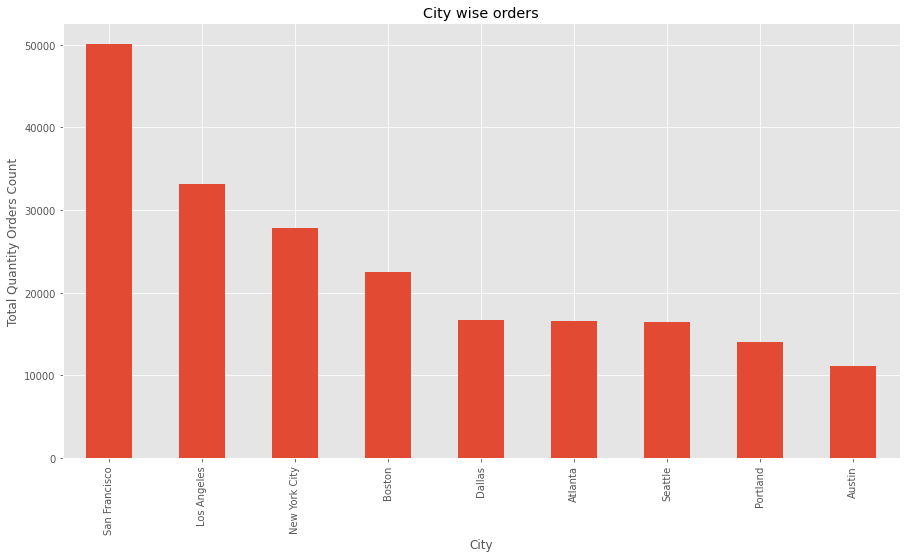

In [36]:
plt.figure(figsize=((15,8)))
temp = df.groupby(['_city'])["Quantity Ordered"].sum().sort_values( ascending=False).head(10)
temp.plot.bar()
plt.title("City wise orders")
plt.ylabel("Total Quantity Orders Count")
plt.xlabel("City")
plt.show()

### <font color='green'>From above plot we can conclude that San francisco, Los Angeles, NYC, Boston, Dallas etc were top most product sold cities .</font>